<a href="https://colab.research.google.com/github/kmouts/PPS_PatternRecognition/blob/main/Decision_Trees_From_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tα δέντρα απόφασης είναι μια ισχυρή μέθοδος πρόβλεψης και εξαιρετικά δημοφιλή.

Είναι δημοφιλή επειδή το τελικό μοντέλο είναι πολύ εύκολο να γίνει κατανοητό. Το τελικό δέντρο εξηγεί ακριβώς γιατί έγινε μια συγκεκριμένη πρόβλεψη, καθιστώντας το πολύ ελκυστικό για επιχειρησιακή χρήση.

Τα δέντρα αποφάσεων παρέχουν επίσης τα θεμέλια για πιο προηγμένες μεθόδους όπως bagging, random forest και gradient boosting.

Σε αυτό το εργαστήριο, θα εφαρμόσουμε τον αλγόριθμο **Classification And Regression Tree (CART)** από τo μηδέν με Python (χωρίς έτοιμες βιβλιοθήκες).

Αφού ολοκληρωθεί το εργαστήριο, θα γνωρίζουμε:

*   Πώς υπολογίζουμε και αξιολογούμε πιθανούς κόμβους προς διαίρεση (split) στα δεδομένα.
*   Πώς συνθέτουμε τις διαιρέσεις σε μια δομή δέντρων αποφάσεων.
*   Πώς εφαρμόζουμε τον αλγόριθμο CART σε ένα πραγματικό πρόβλημα.

# Εισαγωγή
Αυτή η ενότητα παρέχει μια σύντομη εισαγωγή στον αλγόριθμο ταξινόμησης και παλινδρόμησης - CART και στο σύνολο δεδομένων χαρτονομισμάτων που θα χρησιμοποιούμε.

## Δέντρα ταξινόμησης και παλινδρόμησης - CART
Τα δέντρα ταξινόμησης και παλινδρόμησης ή CART για συντομία είναι ένα αρκτικόλεξο που εισήγαγε ο **Leo Breiman** για να περιγράψει δέντρα απόφασης που μπορούν να χρησιμοποιηθούν για προβλήματα πρόβλεψης ταξινόμησης ή παλινδρόμησης.

Εδώ θα εστιάσουμε στη χρήση του CART για **ταξινόμηση**.

Η αναπαράσταση του μοντέλου CART είναι ένα απλό δυαδικό δέντρο. Κάθε κόμβος μπορεί να έχει μηδέν, έναν ή δύο θυγατρικούς κόμβους.

Ένας κόμβος αντιπροσωπεύει μία μεταβλητή εισόδου (X) και ένα σημείο διαχωρισμού (split) σε αυτήν τη μεταβλητή, με την προϋπόθεση ότι η μεταβλητή είναι αριθμητική. Οι κόμβοι φύλλα (ονομάζονται επίσης τερματικοί κόμβοι) του δέντρου περιέχουν μια μεταβλητή εξόδου (y) η οποία χρησιμοποιείται για την πρόβλεψη.

Μόλις δημιουργηθεί ένα δέντρο και έχοντας μία νέα σειρά δεδομένων, μπορούμε να πλοηγηθούμε στα κλαδιά του, ακολουθώντας τον κανόνα κάθε διασπάσης, έως ότου φτάσουμε σε ένα τελικό φύλλο, δηλ. μια πρόβλεψη.

Η δημιουργία ενός δυαδικού δέντρου αποφάσεων είναι στην πραγματικότητα μια διαδικασία διαίρεσης του πεδίου τιμών. Για να διαιρέσει το πεδίο τιμών, χρησιμοποιείται μια προσέγγιση άπληστη (greedy) που ονομάζεται αναδρομική δυαδική διαίρεση (recursive binary splitting). Πρόκειται για μια διαδικασία όπου όλες οι τιμές παρατάσσονται και  δοκιμάζονται με διαφορετικές διαιρέσεις,  χρησιμοποιώντας μια συνάρτηση κόστους.

Επιλέγεται η διαίρεση με το καλύτερο κόστος (δηλ το χαμηλότερο κόστος επειδή ελαχιστοποιούμε το κόστος). Αξιολογούνται όλες οι μεταβλητές εισόδου και όλα τα πιθανά σημεία διαίρεσης και γίνεται η επιλογή με τον άπληστο τρόπο (greedy) με βάση τη συνάρτηση κόστους.

*   **Παλινδρόμηση (regression)**: Η συνάρτηση κόστους που ελαχιστοποιείται για την επιλογή σημείων διαίρεσης υπολογίζεται από το άθροισμα των τετραγώνων σφάλματος.
*   **Ταξινόμηση (classification)**: Χρησιμοποιείται συνήθως η συνάρτηση κόστους **Gini**, η οποία παρέχει μια ένδειξη για το πόσο καθαροί είναι οι κόμβοι, όπου ως 'καθαρότητα'  εννοείται πόσο μικτά (σε κλάσεις) είναι τα δεδομένα εκπαίδευσης που εκχωρούνται σε κάθε κόμβο.

Οι διαιρέσεις συνεχίζονται έως ότου οι κόμβοι να περιέχουν έναν ελάχιστο αριθμό δειγμάτων εκπαίδευσης ή να έχουμε φτάσει σε ένα μέγιστο βάθος στο δέντρο.

## Σύνολο δεδομένων χαρτονομισμάτων
Το σύνολο δεδομένων με τα χαρτονομίσματα περιλαμβάνει και την κλάση αν ένα  χαρτονόμισμα είναι αυθεντικό ή όχι. Η αυθεντικότητα υπολογίζεται με βάση ενός αριθμού μετρήσεων από φωτογραφία του χαρτονομίσματος.

Το σύνολο δεδομένων περιέχει 1.372 γραμμές με 5 αριθμητικές μεταβλητές / χαρακτηριστικά. Πρόκειται για ένα πρόβλημα ταξινόμησης με δύο κατηγορίες (δυαδική ταξινόμηση). Έχουμε 762 γραμμές με κλάση 0 (αυθεντικά), and 610 κλάσης 1 (μη αυθεντικά). Σε ποσοστά είναι class 0 ~ 55%, class 1 ~ 44%. 

Τα πέντε χαρακτηριστικά είναι τα [εξής](https://github.com/kaitai/RunTheWorldMachineLearning/blob/master/Gillich%20and%20Lohweg%20-%20Banknote%20authentication.pdf):

*  διακύμανση (variance) της  Wavelet Transformed (WT) εικόνας (συνεχής μεταβλητή).
*  κλίση ([skewness](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa)) της εικόνας Wavelet Transformed (συνεχής).
*  kurtosis του Wavelet Transformed image (συνεχής).
*  εντροπία της εικόνας (συνεχής).
*  κλάση (ακέραιος).


Ακολουθεί ένα δείγμα των πρώτων 5 σειρών από τα δεδομένα:
```
3.6216,8.6661,-2.8073,-0.44699,0
4.5459,8.1674,-2.4586,-1.4621,0
3.866,-2.6383,1.9242,0.10645,0
3.4566,9.5228,-4.0112,-3.5944,0
0.32924,-4.4552,4.5718,-0.9888,0
4.3684,9.6718,-3.9606,-3.1625,0
```

Χρησιμοποιώντας τον αλγόριθμο μηδενικού κανόνα για την πρόβλεψη της πιο συνηθισμένης τιμής κλάσης (Zero Rule Algorithm), η αρχική ακρίβεια στο πρόβλημα είναι *περίπου* 50%.

Μπορείτε να μάθετε περισσότερα και να κατεβάσετε το σύνολο δεδομένων από [το αποθετήριο μηχανικής εκμάθησης UCI](http://archive.ics.uci.edu/ml/datasets/banknote+authentication).

Κατεβάστε το σύνολο δεδομένων και τοποθετήστε τον στον τρέχοντα κατάλογο εργασίας σας με το όνομα αρχείου data_banknote_authentication.csv.


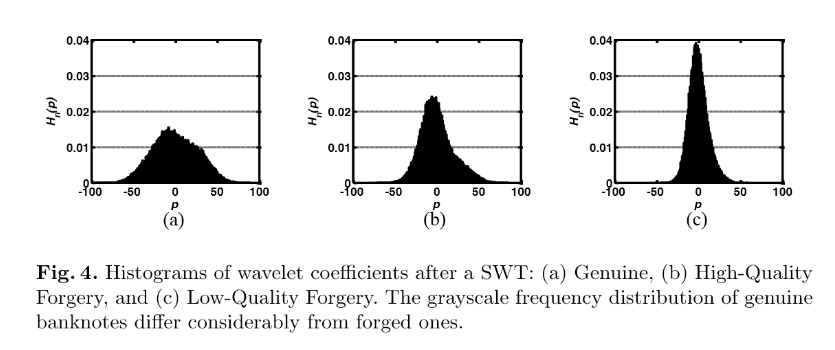

Gillich and Lohweg 2010

# Βήματα Εργαστηρίου
Το εργαστήριο χωρίζεται σε 5 μέρη:

* Δείκτης Gini
* Λειτουργία διαίρεσης
* Φτιάχνουβε ένα δέντρο
* Κάνουμε μια πρόβλεψη
* Μελέτη περίπτωσης χαρτονομισμάτων



## 1. Gini Index
Δείκτης Gini είναι το όνομα της συνάρτησης κόστους για την αξιολόγηση των διαιρέσεων στα δεδομένα:

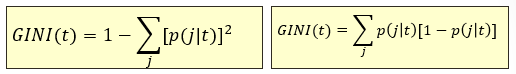


 

> - _Σημείωση: p(j|t) είναι η σχετική συχνότητα της κλάσης j στο κόμβο t_



Η διαίρεση περιλαμβάνει ένα χαρακτηριστικό και μία τιμή για αυτό το χαρακτηριστικό. Μπορεί να χρησιμοποιηθεί για να διαιρέσει τα δεδομένα εκπαίδευσης σε δύο ομάδες.

Το σκορ Gini δίνει μια ιδέα για το πόσο καλή είναι η διαίρεση από το πόσο ανάμεικτες είναι οι κλάσεις στις δύο ομάδες που δημιουργούνται από τη διαίρεση. Ο τέλειος διαχωρισμός οδηγεί σε βαθμολογία Gini 0, ενώ η χειρότερη διαίρεση που οδηγεί σε τάξεις 50/50 σε κάθε ομάδα οδηγεί σε βαθμολογία Gini 0.5 (για πρόβλημα 2 κλάσεων).

Ο υπολογισμός του Gini φαίνεται καλύτερα με ένα παράδειγμα.

Έστω ότι έχουμε έναν πατρικό κόμβο με 4 στοιχεία (2 κλάσης 0 και 2 κλάσης 1): `[0, 0, 1, 1]`, και διαλέγουμε να τα σπάσουμε σε δύο κόμβους (ομάδες) ώς εξής:

| Ομάδες     | Πλήθος |
| ---------- | -------|
| 1          | 2 (C0) |
| 2          | 2 (C1) |

Έχουμε δύο ομάδες δεδομένων με 2 γραμμές σε κάθε ομάδα: `[[0,0],[1,1]]`. Οι γραμμές στην πρώτη ομάδα ανήκουν στην κλάση 0 και οι γραμμές στη δεύτερη ομάδα ανήκουν στην κλάση 1, οπότε έχουμε ένα τέλειο διαχωρισμό.

Πρώτα πρέπει να υπολογίσουμε το ποσοστό των τάξεων σε κάθε ομάδα.

```
proportion = count(class_value) / count(rows)
```
Οι αναλογίες για αυτό το παράδειγμα θα ήταν:
```
group_1_class_0 = 2 / 2 = 1
group_1_class_1 = 0 / 2 = 0
group_2_class_0 = 0 / 2 = 0
group_2_class_1 = 2 / 2 = 1
```
Στη συνέχεια, το Gini υπολογίζεται για κάθε θυγατρικό κόμβο ως εξής:
```
gini_index = sum(proportion * (1.0 - proportion))
gini_index = 1.0 - sum(proportion * proportion)
```
Ο δείκτης Gini για κάθε ομάδα πρέπει στη συνέχεια να σταθμίζεται με βάση το μέγεθος της ομάδας, σε σχέση με όλα τα δείγματα του γονέα, δηλ. τα δείγματα που αυτήν τη στιγμή ομαδοποιούνται. Μπορούμε να προσθέσουμε αυτήν τη στάθμιση στον υπολογισμό Gini για μια ομάδα ως εξής:
```
gini_index = (1.0 - sum(proportion * proportion)) * (group_size/total_samples)
```
Σε αυτό το παράδειγμα, οι βαθμολογίες Gini για κάθε ομάδα υπολογίζονται ως εξής:
```
Gini(group_1) = (1 - (1*1 + 0*0)) * 2/4
Gini(group_1) = 0.0 * 0.5 
Gini(group_1) = 0.0 
Gini(group_2) = (1 - (0*0 + 1*1)) * 2/4
Gini(group_2) = 0.0 * 0.5 
Gini(group_2) = 0.0
```
Οι βαθμολογίες προστίθενται στη συνέχεια σε κάθε θυγατρικό κόμβο στο σημείο διαχωρισμού για να δώσουν ένα τελικό σκορ Gini για το σημείο διαίρεσης που μπορεί να συγκριθεί με άλλα υποψήφια σημεία διαίρεσης.

Το Gini για αυτό το σημείο διαχωρισμού θα υπολογιζόταν τότε ως 0,0 + 0,0 ή ένα τέλειο σκορ Gini 0,0.

Παρακάτω είναι μια συνάρτηση που ονομάζεται `gini_index()`, και υπολογίζει τον δείκτη Gini για μια λίστα ομάδων και μια λίστα γνωστών κλάσεων.

Για να αποφευχθεί η διαίρεση με μηδέν σε περίπτωση κενής ομάδας, μπορείτε να δείτε ότι υπάρχουν κάποιοι έλεγχοι ασφαλείας.



In [ ]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

Μπορούμε να δοκιμάσουμε αυτήν τη συνάρτηση με το προηγούμενο παράδειγμα. Μπορούμε επίσης να δοκιμάσουμε και τη χειρότερη περίπτωση διαίρεσης 50/50 σε κάθε ομάδα.

In [ ]:
# test Gini values
# the notation e.g. for [1, 1, 0] is: [[1,1],[1,1],[1,0]], i.e. for one instance: [1,class]
print(gini_index([[[1, 1], [1, 0]], [[1, 1], [1, 0]]], [0, 1]))
print(gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))
print(gini_index([[[1, 0]], [[1, 0], [1, 1], [1, 1]]], [0, 1]))

Ετσι εκτυπώνει τα δύο σκορ Gini, πρώτα το σκορ για τη χειρότερη περίπτωση στο 0,5 ακολουθούμενο από το σκορ για την καλύτερη περίπτωση στο 0,0. Επίσης υπολογίσαμε την περίπτωση διαμερισμού `[0], [0,1,1]`

Τώρα που ξέρουμε πώς να αξιολογούμε τα αποτελέσματα μιας διαίρεσης, ας δούμε τη λειτουργία διαίρεσης.

## 2. Λειτουργία διαίρεσης
Η διαίρεση χρειάζεται ένα χαρακτηριστικό στο σύνολο δεδομένων και μια τιμή.

Μπορούμε να το συνοψίσουμε ως τη σειρά ενός χαρακτηριστικού προς διάσπαση και την τιμή με την οποία χωρίζονται οι σειρές στο συγκεκριμένο χαρακτηριστικό. 

Η λειτουργία διαίρεσης περιλαμβάνει τρία μέρη, το πρώτο που έχουμε ήδη εξετάσει, το οποίο υπολογίζει το σκορ Gini. Τα υπόλοιπα δύο μέρη είναι:

1.   Διαίρεση των δεδομένων.
2.   Αξιολόγηση όλων των διαιρέσεων.

Ας ρίξουμε μια ματιά σε καθένα.

### 2.1. Διαίρεση των δεδομένων
Διαίρεση των δεδομένων σημαίνει διαίρεση σε δύο λίστες γραμμών, δεδομένου της θέσης ενός χαρακτηριστικού και μιας τιμής διαχωρισμού για αυτό το χαρακτηριστικό.

Μόλις έχουμε τις δύο ομάδες, μπορούμε στη συνέχεια να υπολογίσουμε το παραπάνω σκορ Gini για να αξιολογήσουμε το κόστος της διάσπασης.

Ο διαχωρισμός των δεδομένων περιλαμβάνει την επανάληψη σε κάθε σειρά, ελέγχοντας εάν η τιμή του χαρακτηριστικού είναι κάτω ή πάνω από την τιμή διαίρεσης και εκχώρηση στην αριστερή ή δεξιά ομάδα αντίστοιχα.

Ακολουθεί μια συνάρτηση που ονομάζεται `test_split()` που εφαρμόζει αυτήν τη διαδικασία.

In [ ]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

Σημειώστε ότι η δεξιά ομάδα περιέχει όλες τις σειρές με τιμή στο χαρακτηριστικό παραπάνω ή ίσο με την τιμή διαίρεσης.

### 2.2. Αξιολόγηση όλων των διαιρέσεων
Με τη παραπάνω συνάρτηση Gini και τη συνάρτηση `test_split` έχουμε πλέον ό, τι χρειαζόμαστε  για την αξιολόγηση των διαιρέσεων.

Λαμβάνοντας υπόψη ένα σύνολο δεδομένων, πρέπει να ελέγξουμε κάθε τιμή σε κάθε χαρακτηριστικό ως υποψήφια διαίρεση, να αξιολογήσουμε το κόστος της διαίρεσης και έτσι να βρούμε τον καλύτερο δυνατό διαχωρισμό.

Μόλις βρεθεί η καλύτερη διάσπαση, μπορούμε να τη χρησιμοποιήσουμε ως κόμβο στο δέντρο αποφάσεων.

Αυτός είναι ένας εξαντλητικός (exhaustive) και άπληστος (greedy) αλγόριθμος.

Θα χρησιμοποιήσουμε ένα λεξικό (dictionary) για να αντιπροσωπεύσουμε έναν κόμβο στο δέντρο αποφάσεων καθώς μπορούμε να αποθηκεύσουμε δεδομένα με το όνομα. Κατά την επιλογή του καλύτερου διαχωρισμού και τη χρήση του ως νέου κόμβου για το δέντρο, θα αποθηκεύουμε τη θέση του επιλεγμένου χαρακτηριστικού, την τιμή αυτού του χαρακτηριστικού με το οποίο θα διαχωριστεί και τις δύο ομάδες δεδομένων που προκύπτουν από το επιλεγμένο σημείο διαχωρισμού.

Κάθε ομάδα δεδομένων είναι το δικό της μικρό σύνολο δεδομένων που προκύπτει από τις σειρές που έχουν εκχωρηθεί στην αριστερή ή δεξιά ομάδα κατά τη διαδικασία διαχωρισμού. Μπορείτε να φανταστείτε πώς μπορούμε να χωρίσουμε ξανά κάθε ομάδα, αναδρομικά καθώς χτίζουμε το δέντρο αποφάσεων.

Ακολουθεί μια συνάρτηση που ονομάζεται `get_split()` που εφαρμόζει αυτήν τη διαδικασία. Μπορείτε να δείτε ότι λαμβάνει με τη σειρά κάθε χαρακτηριστικό (εκτός από την τιμή κλάσης) και έπειτα κάθε τιμή για αυτό το χαρακτηριστικό, διαχωρίζοντας και αξιολογώντας διαιρέσεις καθώς προχωράει.

Καταγράφεται η καλύτερη διαίρεση και μετά επιστρέφεται αφού ολοκληρωθούν όλοι οι έλεγχοι.

In [ ]:
# Select the best split point for a dataset
def get_split(dataset, to_print=False):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if to_print:
			  print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

Μπορούμε να δημιουργήσουμε ένα μικρό σύνολο δεδομένων για να δοκιμάσουμε αυτήν τη λειτουργία και όλη τη διαδικασία διαχωρισμού συνόλου δεδομένων.

In [ ]:
dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]

In [ ]:
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
df = DataFrame (dataset,columns=['x','y','class'])
# print(df)
categories = np.unique(df['class'])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors)) 
df["Color"] = df['class'].apply(lambda x: colordict[x])
plt.scatter(df['x'], df['y'], c=df.Color)

Όπως φαίνεται από το γράφημα, δεν θα ήταν δύσκολο να επιλέξουμε χειροκίνητα μια τιμή της παραμέτρου X1 (άξονας x στο διάγραμμα) για να διαχωρίσουμε αυτό το σύνολο δεδομένων.

Η συνάρτηση `get_split()` περιέχει μια εντολή print για να εκτυπώνει κάθε σημείο διαχωρισμού και τον δείκτη Gini όπως υπολογίστηκε.

Η εκτέλεση του παραδείγματος εκτυπώνει όλες τις τιμές Gini και στη συνέχεια τη βαθμολογία του καλύτερου διαχωρισμού στο σύνολο δεδομένων του X1<6.642 με δείκτη Gini 0,0 ή ένα τέλειο split.

In [ ]:
split = get_split(dataset,to_print=True)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

Τώρα που ξέρουμε πώς να βρούμε τα καλύτερα σημεία διαχωρισμού σε ένα σύνολο δεδομένων (ή μια λίστα γραμμών), ας δούμε πώς μπορούμε να το χρησιμοποιήσουμε για να δημιουργήσουμε ένα δέντρο αποφάσεων.

## 3. Φτιάξτε ένα δέντρο
Η δημιουργία του ριζικού κόμβου του δέντρου είναι εύκολη.

Καλούμε την παραπάνω συνάρτηση `get_split()` χρησιμοποιώντας ολόκληρο το σύνολο δεδομένων.

Πιο ενδιαφέρουσα είναι η προσθήκη περισσότερων κόμβων στο δέντρο.

Η οικοδόμηση ενός δέντρου μπορεί να χωριστεί σε 3 μέρη:

1.   Τερματικοί κόμβοι (φύλλα)
2.   Αναδρομική διαίρεση
3.   Χτίζοντας το δέντρο





### 3.1. Τερματικοί κόμβοι
Πρέπει να αποφασίσουμε πότε θα σταματήσουμε να μεγαλώνουμε ένα δέντρο.

Μπορούμε να το κάνουμε χρησιμοποιώντας το βάθος και τον αριθμό δεδομένων εκπαίδευσης για τα οποία είναι υπεύθυνος ο κόμβος.

*   **Μέγιστο Βάθος Δέντρου**. Αυτός είναι ο μέγιστος αριθμός κόμβων από τον ριζικό κόμβο του δέντρου. Μόλις επιτευχθεί το μέγιστο βάθος του δέντρου, πρέπει να σταματήσουμε να διαιρούμε προσθέτοντας νέους κόμβους. Τα βαθύτερα δέντρα είναι πιο περίπλοκα και πιο πιθανά σε υπερ-εκπαίδευση (overfit).
*   **Ελάχιστο πλήθος δειγμάτων σε κόμβο** . Αυτός είναι ο ελάχιστος αριθμός δειγμάτων εκπαίδευσης για τους οποίους είναι υπεύθυνος ένας δεδομένος κόμβος. Μόλις φτάσει ίσο ή κάτω από αυτό το ελάχιστο, πρέπει να σταματήσουμε να διαιρούμε και να προσθέτουμε νέους κόμβους. Οι κόμβοι που αντιπροσωπεύουν πολύ λίγα δεδομένα εκπαίδευσης είναι πιθανό να αποτελούν σημεία υπερ-εκπαίδευσης.

Αυτές οι δύο προσεγγίσεις θα είναι ορίσματα στη διαδικασία μας δημιουργίας δέντρων.

Υπάρχει ένας ακόμη όρος. Είναι δυνατόν να επιλεγεί μια διαίρεση στην οποία όλα τα δείγματα ανήκουν σε μια ομάδα. Σε αυτήν την περίπτωση, δεν θα είμαστε σε θέση να συνεχίσουμε να χωρίζουμε και να προσθέτουμε θυγατρικούς κόμβους.

Τώρα έχουμε κάποιες ιδέες για το πότε να σταματήσουμε να μεγαλώνουμε το δέντρο. Όταν σταματάμε να αναπτύσσουμε σε ένα δεδομένο σημείο, αυτός ο κόμβος ονομάζεται τερματικός κόμβος και χρησιμοποιείται για να κάνουμε μια τελική πρόβλεψη.

Λαμβάνουμε τα δείγματα που έχουν εκχωρηθεί σε αυτόν τον κόμβο και επιλέγουμε την πιο κοινή τιμή κλάσης στην ομάδα. Αυτό θα χρησιμοποιηθεί για την πραγματοποίηση προβλέψεων.

Παρακάτω είναι μια συνάρτηση που ονομάζεται `to_terminal()` που θα επιλέγει κλάση για μια ομάδα δειγμάτων. Επιστρέφει την πιο κοινή τιμή εξόδου.

In [ ]:
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

### 3.2. Αναδρομική διαίρεση
Μέχρι στιγμής γνωρίζουμε πώς και πότε να δημιουργήσουμε τερματικούς κόμβους, οπότε τώρα μπορούμε να χτίσουμε το δέντρο μας.

Η δημιουργία του δέντρου περιλαμβάνει την κλήση της παραπάνω συνάρτησης `get_split()` ξανά και ξανά στις ομάδες που δημιουργήθηκαν για κάθε κόμβο.

Νέοι κόμβοι που προστίθενται σε έναν υπάρχοντα κόμβο ονομάζονται **θυγατρικοί κόμβοι**. Ένας κόμβος μπορεί να έχει μηδέν παιδιά (τερματικός κόμβος), ένα παιδί (η μία πλευρά κάνει μια πρόβλεψη απευθείας) ή δύο θυγατρικούς κόμβους. Θα αναφερόμαστε στους θυγατρικούς κόμβους ως αριστερό και δεξιό στην αναπαράσταση dictionary ενός δεδομένου κόμβου.

Μόλις δημιουργηθεί ένας κόμβος, μπορούμε να δημιουργήσουμε θυγατρικούς κόμβους αναδρομικά σε κάθε ομάδα δεδομένων από τη διαίρεση καλώντας ξανά την ίδια συνάρτηση.

Παρακάτω είναι μια συνάρτηση που εφαρμόζει αυτήν την αναδρομική διαδικασία. Παίρνει έναν κόμβο ως όρισμα, καθώς και το μέγιστο βάθος, τον ελάχιστο αριθμό δειγμάτων σε έναν κόμβο και το τρέχον βάθος ενός κόμβου.

Μπορείτε να φανταστείτε πώς η συνάρτηση καλείται για πρώτη φορά περνώντας ως όρισμα τον ριζικό κόμβο και το βάθος του 1. Αυτή η λειτουργία εξηγείται καλύτερα με βήματα:

1.  Πρώτον, οι δύο ομάδες δεδομένων που διαιρούνται από τον κόμβο εξάγονται και διαγράφονται από τον κόμβο. Καθώς εργαζόμαστε σε αυτές τις ομάδες, ο κόμβος δεν απαιτεί πλέον πρόσβαση σε αυτά τα δεδομένα.
2.  Στη συνέχεια, ελέγχουμε εάν είτε η αριστερά είτε η δεξιά ομάδα δειγμάτων είναι κενή και εάν ναι, δημιουργούμε έναν τερματικό κόμβο χρησιμοποιώντας τα δείγματα που έχουμε.
3.  Στη συνέχεια, ελέγχουμε εάν έχουμε φτάσει στο μέγιστο βάθος μας και αν ναι, δημιουργούμε έναν  τερματικό κόμβο.
4.  Στη συνέχεια επεξεργαζόμαστε το αριστερό παιδί, δημιουργώντας έναν τερματικό κόμβο εάν το πλήθος δειγμάτων είναι πολύ μικρό, διαφορετικά δημιουργούμε και προσθέτουμε τον αριστερό κόμβο με λογική depth-first μέχρι να φτάσει το κάτω μέρος του δέντρου σε αυτόν τον κλάδο.
5.  Στη συνέχεια, η δεξιά πλευρά επεξεργάζεται με τον ίδιο τρόπο, καθώς ανεβαίνουμε προς τα πίσω το δομημένο δέντρο προς τη ρίζα.

In [ ]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)

### 3.3. Χτίζοντας το δέντρο
Μπορούμε τώρα να βάλουμε όλα τα κομμάτια μαζί.

Η κατασκευή του δέντρου περιλαμβάνει τη δημιουργία του ριζικού κόμβου και την κλήση της συνάρτησης `split()` που στη συνέχεια καλείται αναδρομικά για τη δημιουργία ολόκληρου του δέντρου.

Ακολουθεί η μικρή συνάρτηση `build_tree()` που εφαρμόζει αυτήν τη διαδικασία.

In [ ]:
# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root

Μπορούμε να δοκιμάσουμε ολόκληρη τη διαδικασία χρησιμοποιώντας το μικρό σύνολο δεδομένων που σχεδιάσαμε παραπάνω.

Ας περιλάβουμε όμως πρώτα μια μικρή συνάρτηση `print_tree()` που εκτυπώνει αναδρομικά κόμβους του δέντρου αποφάσεων με μία γραμμή ανά κόμβο.


In [ ]:
# Print a decision tree
def print_tree(node, depth=0):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

**Ακολουθεί το πλήρες παράδειγμα**.

 Αν και δεν είναι τόσο εντυπωσιακό όσο ένα πραγματικό διάγραμμα δέντρων αποφάσεων, δίνει μια ιδέα για τη δομή του δέντρου και τις αποφάσεις που λαμβάνονται καθ 'όλη τη διάρκεια της διαδικασίας.

In [ ]:
tree = build_tree(dataset, 1, 1)
print_tree(tree)

Μπορούμε να αλλάξουμε το όρισμα μέγιστου βάθους καθώς τρέχουμε αυτό το παράδειγμα και να δούμε την επίδραση στο τυπωμένο δέντρο.

Με μέγιστο βάθος 1 (η δεύτερη παράμετρος στη συνάρτηση `build_tree()`), μπορούμε να δούμε ότι το δέντρο χρησιμοποιεί το τέλειο διαχωρισμό που ανακαλύψαμε στην προηγούμενη ενότητα. Αυτό είναι ένα δέντρο με έναν κόμβο, που ονομάζεται επίσης decision stump.
```
[X1 < 6.642]
 [0]
 [1]
```



Αυξάνοντας το μέγιστο βάθος σε 2, αναγκάζουμε το δέντρο να κάνει διαιρέσεις ακόμα και όταν δεν απαιτείται. Στη συνέχεια, το χαρακτηριστικό X1 χρησιμοποιείται ξανά από τα αριστερά και τα δεξιά παιδιά του ριζικού κόμβου για να χωρίσει τον ήδη τέλειο συνδυασμό τάξεων.

In [ ]:
tree = build_tree(dataset, 2, 1)
print_tree(tree)

Τέλος, μπορούμε να επιβάλουμε ένα ακόμη επίπεδο διαχωρισμού με μέγιστο βάθος 3

In [ ]:
tree = build_tree(dataset, 3, 1)
print_tree(tree)

Αυτές οι δοκιμές δείχνουν ότι υπάρχει χώρος να βελτιωθεί η εφαρμογή ώστε να αποφεύγονται περιττοί διαχωρισμοί.

Τώρα που μπορούμε να δημιουργήσουμε ένα δέντρο αποφάσεων, ας δούμε πώς μπορούμε να το χρησιμοποιήσουμε για να κάνουμε προβλέψεις σε νέα δεδομένα.

## 4. Κάνοντας προβλέψεις
Η πραγματοποίηση προβλέψεων με ένα δέντρο αποφάσεων περιλαμβάνει την πλοήγηση στο δέντρο με τη συγκεκριμένη σειρά δεδομένων.

Και πάλι, μπορούμε να το υλοποιήσουμε χρησιμοποιώντας μια αναδρομική συνάρτηση, όπου η ίδια ρουτίνα πρόβλεψης καλείται ξανά με τον αριστερό ή τον δεξιό θυγατρικό κόμβο, ανάλογα με το πώς η διαίρεση επηρεάζει τα παρεχόμενα δεδομένα.

Πρέπει να ελέγχουμε εάν ένας θυγατρικός κόμβος είναι είτε μια τελική τιμή που θα επιστραφεί ως πρόβλεψη, είτε εάν πρόκειται για ένα dictionary κόμβο που περιέχει και άλλο επίπεδο του δέντρου που πρέπει να ληφθεί υπόψη.

Ακολουθεί η συνάρτηση ```predict()``` που εφαρμόζει αυτήν τη διαδικασία. 

Μπορείτε να δείτε πώς η θέση και η τιμή χρησιμοποιείται σε έναν δεδομένο κόμβο για να αξιολογηθεί εάν η σειρά των παρεχόμενων δεδομένων εμπίπτει στα αριστερά ή στα δεξιά της διαίρεσης.

In [ ]:
# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

Μπορούμε να χρησιμοποιήσουμε το δοκιμαστικό σύνολο δεδομένων μας για να δοκιμάσουμε αυτήν τη συνάρτηση. Παρακάτω είναι ένα παράδειγμα που χρησιμοποιεί ένα δέντρο αποφάσεων με έναν μόνο κόμβο - stump (φτιαγμένο με το χέρι από εμάς) που διαχωρίζει καλύτερα τα δεδομένα.

Το παράδειγμα κάνει μια πρόβλεψη για κάθε σειρά στο σύνολο δεδομένων.

In [ ]:
#  predict with a stump
stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for row in dataset:
	prediction = predict(stump, row)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Τώρα ξέρουμε πώς να δημιουργήσουμε ένα δέντρο αποφάσεων και να το χρησιμοποιήσουμε για να κάνουμε προβλέψεις. Μπορούμε πλέον, να το εφαρμόσουμε σε ένα πραγματικό σύνολο δεδομένων.

## 5. Μελέτη περίπτωσης χαρτονομισμάτων
Αυτή η ενότητα εφαρμόζει τον αλγόριθμο CART στο σύνολο δεδομένων τραπεζογραμματίων.

Το πρώτο βήμα είναι να φορτώσουμε το σύνολο δεδομένων και να το μετατρέψουμε σε αριθμούς να που μπορούμε να χρησιμοποιήσουμε για τον υπολογισμό των σημείων διαίρεσης.


In [ ]:
import pandas as pd
url_to_the_file  = "http://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
banknote_dataset = pd.read_csv(url_to_the_file, header = None)

In [ ]:
banknote_dataset.head()

In [ ]:
banknotes=banknote_dataset.values.tolist()

Θα αξιολογήσουμε τον αλγόριθμο χρησιμοποιώντας k-fold cross-validation με 5 φορές. Αυτό σημαίνει ότι 1372/5 = 274.4 ή πάνω από 270 εγγραφές θα χρησιμοποιηθούν σε κάθε πτυχή. Θα χρησιμοποιήσουμε τις βοηθητικές συναρτήσεις `evalu_algorithm()` για να αξιολογήσουμε τον αλγόριθμο με CV και `accuracy_metric()` για να υπολογίσουμε την ακρίβεια των προβλέψεων.


In [ ]:
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores


Αναπτύχθηκε μια νέα συνάρτηση με την ονομασία `decision_tree()` για τη διαχείριση της εφαρμογής του αλγορίθμου CART, δημιουργώντας πρώτα το δέντρο από το σύνολο δεδομένων εκπαίδευσης και, στη συνέχεια, χρησιμοποιεί το δέντρο για να γίνονται προβλέψεις στο σύνολο δεδομένων δοκιμής.

In [ ]:
# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
	tree = build_tree(train, max_depth, min_size)
	predictions = list()
	for row in test:
		prediction = predict(tree, row)
		predictions.append(prediction)
	return(predictions)
 
from random import seed
from random import randrange
# Test CART on Bank Note dataset
seed(1)
# load and prepare data
filename = 'data_banknote_authentication.csv'
dataset = banknotes

# evaluate algorithm
n_folds = 5
max_depth = 5
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Το παράδειγμα χρησιμοποιεί μέγιστο βάθος δέντρου 5 επιπέδων και τον ελάχιστο αριθμό σειρών ανά κόμβο έως 10. Αυτές οι παράμετροι στο CART επιλέχθηκαν με λίγο πειραματισμό, αλλά σε καμία περίπτωση δεν είναι βέλτιστες.

Η εκτέλεση του παραδείγματος εκτυπώνει τη μέση ακρίβεια ταξινόμησης σε κάθε πτυχή, καθώς και τη μέση απόδοση σε όλες τις πτυχές.

Μπορείτε να δείτε ότι το CART και η επιλεγμένη διαμόρφωση πέτυχαν μια μέση ακρίβεια ταξινόμησης περίπου 97% που είναι δραματικά καλύτερη από τον αλγόριθμο Zero Rule που εκτιμούμε ότι έχει ακρίβεια γύρω στο 50%.

# Επεκτάσεις
Αυτή η ενότητα παραθέτει πιθανές επεκτάσεις σε αυτόν το κώδικα.

*  **Ρύθμιση αλγορίθμου**. Η εφαρμογή του CART στο σύνολο 
δεδομένων χαρτονομισμάτων δεν είναι η βέλτιστη. Πειραματιστείτε με διαφορετικές τιμές παραμέτρων και δείτε εάν μπορείτε να επιτύχετε καλύτερη απόδοση.
*  **Cross Entropy**. Μια άλλη συνάρτηση κόστους για την αξιολόγηση των διαχωρισμών είναι η cross entropy (logloss). Θα μπορούσατε να εφαρμόσετε και να πειραματιστείτε με αυτήν τη συνάρτηση κόστους.
* **Κλάδεμα δέντρων-pruning**. Μια σημαντική τεχνική για τη μείωση της υπερεκπαίδευσης είναι να κλαδεύετε τα δέντρα. Διερευνήστε και εφαρμόστε μεθόδους κλαδέματος δέντρων.
* **Ονομαστικά χαρακτηριστικά** . Το παράδειγμα σχεδιάστηκε για δεδομένα εισόδου με αριθμητικά ή σειριακά χαρακτηριστικά, πειραματιστείτε με ονομαστικά δεδομένα εισόδου και διαιρέσεις που μπορούν να χρησιμοποιούν ισότητα αντί για κατάταξη.
* **Παλινδρόμηση**. Προσαρμόστε το δέντρο για παλινδρόμηση χρησιμοποιώντας διαφορετική συνάρτηση κόστους και μέθοδο για τη δημιουργία τερματικών κόμβων.
* **Περισσότερα σύνολα δεδομένων**. Εφαρμόστε τον αλγόριθμο σε περισσότερα σύνολα δεδομένων στο UCI Machine Learning Repository.